In [1]:
import numpy as np
import pandas as pd

In [2]:
car = pd.read_csv("Car details v3.csv")

In [3]:

del car['name'],car['torque'],car['max_power']

In [4]:
car.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,5.0


In [5]:
car.shape

(8128, 10)

In [6]:
car['mileage'] = car['mileage'].str.replace('kmpl','')
car['mileage'] = car['mileage'].str.replace('km/kg','')
car['mileage'] = car['mileage'].astype(str).astype(float)

In [7]:
car['engine'] = car['engine'].str.replace('CC','')
car['engine'] = car['engine'].str.replace('nan','')
car['engine'] = car['engine'].astype(str).astype(float)

In [8]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8128 non-null   int64  
 1   selling_price  8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   object 
 4   seller_type    8128 non-null   object 
 5   transmission   8128 non-null   object 
 6   owner          8128 non-null   object 
 7   mileage        7907 non-null   float64
 8   engine         7907 non-null   float64
 9   seats          7907 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 635.1+ KB


In [9]:
car['transmission'].value_counts()

Manual       7078
Automatic    1050
Name: transmission, dtype: int64

In [10]:
from sklearn import preprocessing

lab_encoder = preprocessing.LabelEncoder()
car['fuel'] = lab_encoder.fit_transform(car['fuel'])

In [11]:
car['seller_type'] = lab_encoder.fit_transform(car['seller_type'])
car['transmission'] = lab_encoder.fit_transform(car['transmission'])
car['owner'] = lab_encoder.fit_transform(car['owner'])

In [12]:
car.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats
0,2014,450000,145500,1,1,1,0,23.40,1248.0,5.0
1,2014,370000,120000,1,1,1,2,21.14,1498.0,5.0
2,2006,158000,140000,3,1,1,4,17.70,1497.0,5.0
3,2010,225000,127000,1,1,1,0,23.00,1396.0,5.0
4,2007,130000,120000,3,1,1,0,16.10,1298.0,5.0


In [13]:
car.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats
0,2014,450000,145500,1,1,1,0,23.40,1248.0,5.0
1,2014,370000,120000,1,1,1,2,21.14,1498.0,5.0
2,2006,158000,140000,3,1,1,4,17.70,1497.0,5.0
3,2010,225000,127000,1,1,1,0,23.00,1396.0,5.0
4,2007,130000,120000,3,1,1,0,16.10,1298.0,5.0


In [14]:
corr_matrix = car.corr()
corr_matrix['selling_price'].value_counts(ascending=False)

 0.414092    1
-0.126054    1
 0.455734    1
 0.041358    1
-0.335857    1
-0.229174    1
-0.588845    1
-0.225534    1
-0.194029    1
 1.000000    1
Name: selling_price, dtype: int64

In [15]:
from matplotlib import pyplot as plt

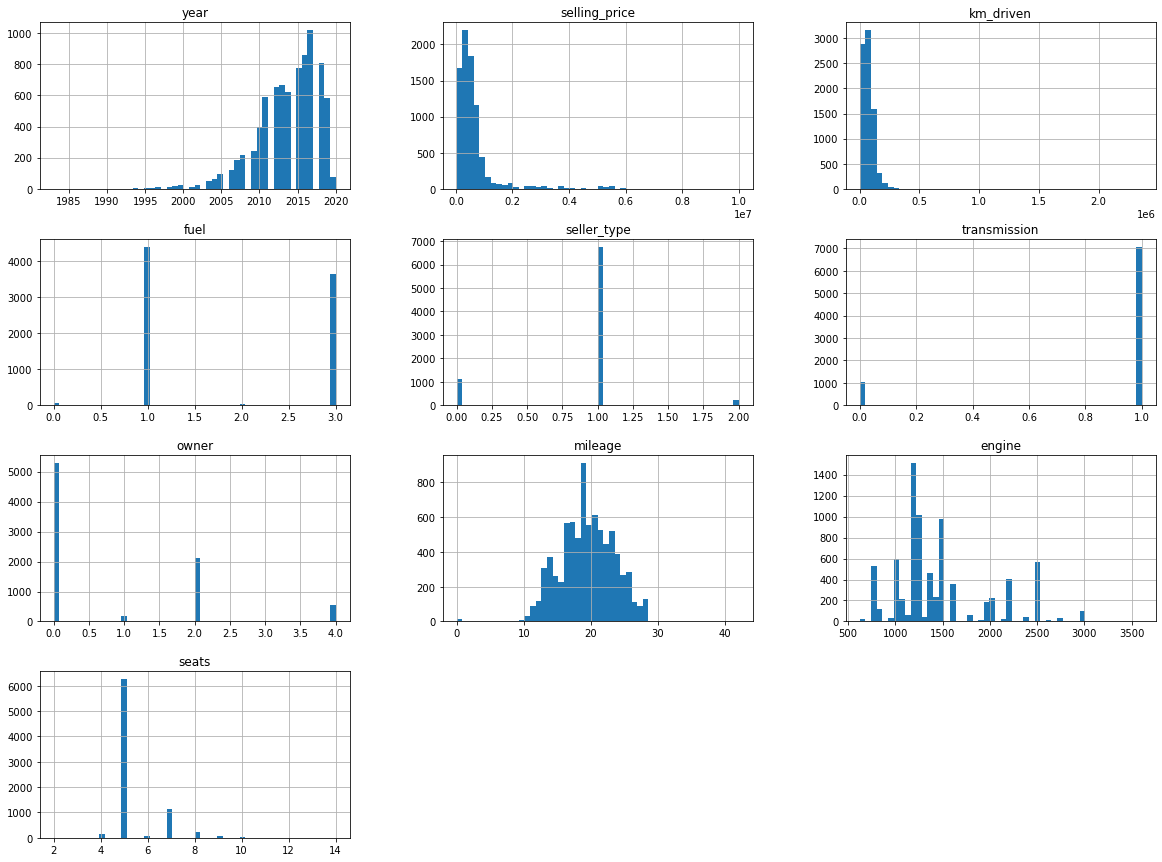

In [16]:
car.hist(bins=50,figsize=(20,15))
plt.show()

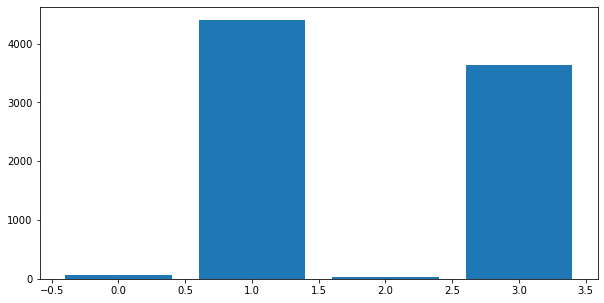

In [17]:
plt.figure(figsize=(10,5))
plt.bar(list(car['fuel'].value_counts().keys()[0:5]),list(car['fuel'].value_counts().values)[0:5])
plt.show()

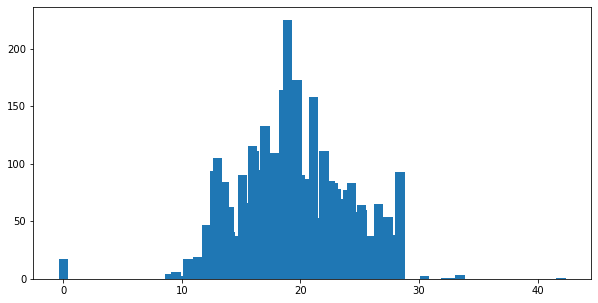

In [18]:
plt.figure(figsize=(10,5))
plt.bar(list(car['mileage'].value_counts().keys()),list(car['mileage'].value_counts().values))
plt.show()

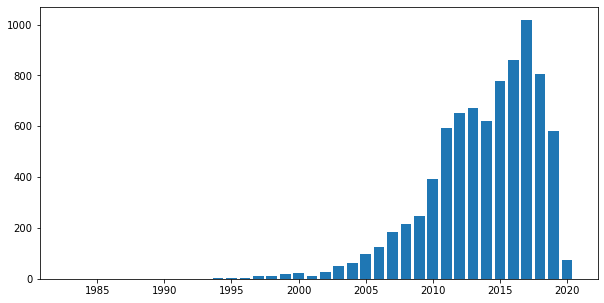

In [19]:
plt.figure(figsize=(10,5))
plt.bar(list(car['year'].value_counts().keys()),list(car['year'].value_counts().values))
plt.show()

In [20]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8128 non-null   int64  
 1   selling_price  8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   int32  
 4   seller_type    8128 non-null   int32  
 5   transmission   8128 non-null   int32  
 6   owner          8128 non-null   int32  
 7   mileage        7907 non-null   float64
 8   engine         7907 non-null   float64
 9   seats          7907 non-null   float64
dtypes: float64(3), int32(4), int64(3)
memory usage: 508.1 KB


In [21]:
car['selling_price'] = car['selling_price'].div(100000)

In [22]:
car.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats
0,2014,4.50,145500,1,1,1,0,23.40,1248.0,5.0
1,2014,3.70,120000,1,1,1,2,21.14,1498.0,5.0
2,2006,1.58,140000,3,1,1,4,17.70,1497.0,5.0
3,2010,2.25,127000,1,1,1,0,23.00,1396.0,5.0
4,2007,1.30,120000,3,1,1,0,16.10,1298.0,5.0


## Train test split

In [23]:
car.dropna(inplace=True)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x = car.drop('selling_price',axis=1)
y = car['selling_price'].copy()

In [26]:
x_train ,x_test ,y_train,y_test = train_test_split(x,y ,test_size=0.3)

In [27]:
x_train.shape , x_test.shape , y_train.shape

((5534, 9), (2373, 9), (5534,))

In [28]:

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)
y_predict = model.predict(x_train)

In [29]:

from sklearn.metrics import r2_score

r2 = r2_score(y_train,y_predict)
print(r2)

0.9916841358663163


# ploting the actual and predicted price

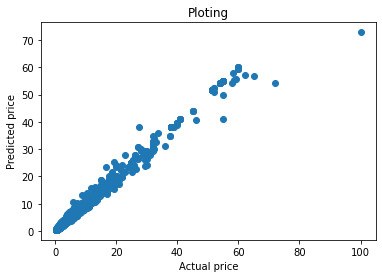

In [30]:
plt.scatter(y_train,y_predict)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Ploting")
plt.show()

In [31]:
a = list(y_train[0:10])
b = list(y_predict[0:10])
data = {'actual':a,'predicted':b}
df = pd.DataFrame(data)

In [32]:
df

,actual,predicted
0,2.10,1.955500
1,2.25,2.576821
2,4.11,3.897000
3,2.75,2.817100
4,6.25,5.341500
5,6.30,6.028568
6,1.48,1.571800
7,1.80,1.835400
8,5.40,4.922200
9,3.50,3.756400


## Testing the model

In [33]:
test_predict = model.predict(x_test)

In [34]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test,test_predict)
print(r2)

0.9479400148122903


In [35]:
model

RandomForestRegressor()

In [36]:
from joblib import load,dump
dump(model,'car price.joblib')

['car price.joblib']

In [37]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5534 entries, 5857 to 3484
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          5534 non-null   int64  
 1   km_driven     5534 non-null   int64  
 2   fuel          5534 non-null   int32  
 3   seller_type   5534 non-null   int32  
 4   transmission  5534 non-null   int32  
 5   owner         5534 non-null   int32  
 6   mileage       5534 non-null   float64
 7   engine        5534 non-null   float64
 8   seats         5534 non-null   float64
dtypes: float64(3), int32(4), int64(2)
memory usage: 345.9 KB


In [38]:
car.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats
0,2014,4.50,145500,1,1,1,0,23.40,1248.0,5.0
1,2014,3.70,120000,1,1,1,2,21.14,1498.0,5.0
2,2006,1.58,140000,3,1,1,4,17.70,1497.0,5.0
3,2010,2.25,127000,1,1,1,0,23.00,1396.0,5.0
4,2007,1.30,120000,3,1,1,0,16.10,1298.0,5.0


In [39]:
car[:567]

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats
0,2014,4.50,145500,1,1,1,0,23.40,1248.0,5.0
1,2014,3.70,120000,1,1,1,2,21.14,1498.0,5.0
2,2006,1.58,140000,3,1,1,4,17.70,1497.0,5.0
3,2010,2.25,127000,1,1,1,0,23.00,1396.0,5.0
4,2007,1.30,120000,3,1,1,0,16.10,1298.0,5.0
...,...,...,...,...,...,...,...,...,...,...
581,2013,2.45,70000,1,1,1,2,20.00,1399.0,5.0
582,2012,2.10,76000,3,1,1,1,20.36,1197.0,5.0
583,2020,7.30,1500,3,1,1,0,21.21,1197.0,5.0
584,2012,5.00,76000,1,1,1,0,15.96,2523.0,7.0


In [40]:
x_train['fuel'].value_counts(),car['fuel'].value_counts()

(1    2990
 3    2481
 0      42
 2      21
 Name: fuel, dtype: int64,
 1    4299
 3    3520
 0      53
 2      35
 Name: fuel, dtype: int64)

In [41]:
x_train['seller_type'].value_counts(),car['seller_type'].value_counts()

(1    4612
 0     764
 2     158
 Name: seller_type, dtype: int64,
 1    6564
 0    1107
 2     236
 Name: seller_type, dtype: int64)

In [42]:
x_train['transmission'].value_counts(),car['transmission'].value_counts()


(1    4812
 0     722
 Name: transmission, dtype: int64,
 1    6866
 0    1041
 Name: transmission, dtype: int64)

In [43]:
x_train['owner'].value_counts(),car['owner'].value_counts()

(0    3634
 2    1430
 4     351
 1     115
 3       4
 Name: owner, dtype: int64,
 0    5215
 2    2017
 4     510
 1     160
 3       5
 Name: owner, dtype: int64)